In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [324]:
class KMeansClustering:
    
    def __init__(self, k=3):
        self.k = k
        self.centroids = None 

    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))
        
    def fit(self, X, max_iterations=200):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))
        
        for _ in range(max_iterations):
            all_c = []
            y = []
            for data_point in X:
                distances = KMeansClustering.euclidean_distance(data_point, self.centroids) 
                cluster_num = np.argmin(distances)
                y.append(cluster_num)
            y = np.array(y)              
            cluster_indices = []
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y==i))

            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                     cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])

            if np.max(self.centroids - np.array(cluster_centers)) < 0.001:
                break
            else:
                self.centroids = np.array(cluster_centers)
        return y

In [338]:
cluster1 = np.random.uniform(8, 20, (100, 3))
cluster2 = np.random.uniform(0, 12, (100, 3))
full = np.concatenate((cluster1, cluster2), axis=0)

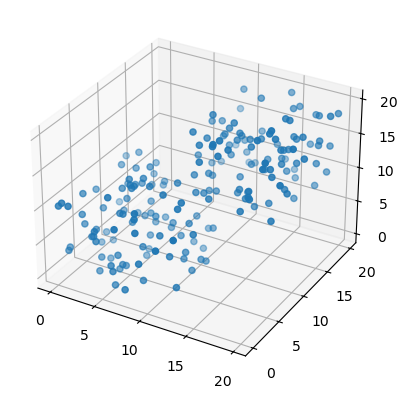

In [376]:
ax = plt.axes(projection='3d')
ax.scatter(full[:, 0], full[:, 1], full[:, 2])

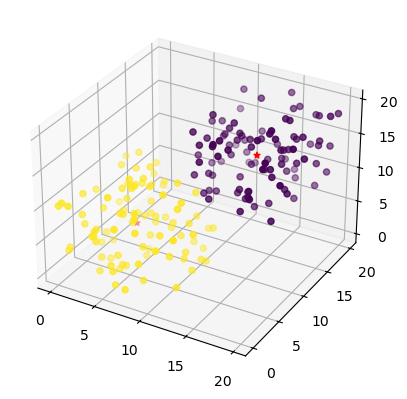

In [386]:
kmeans = KMeansClustering(k=2)
groups = kmeans.fit(full, max_iterations=200)
ax = plt.axes(projection='3d')
ax.scatter(full[:, 0], full[:, 1], full[:, 2], c=groups)
ax.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], kmeans.centroids[:, 2], c='red', marker='*', s=20)
plt.show()